##Example of comparing maf run results##

In [1]:
from lsst.sims.maf.db import ResultsDb

In [2]:
runs = {}
runs['enigma_1189'] = {}
runs['enigma_1189']['sched'] = ResultsDb(outDir = 'enigma_1189/sched')
runs['enigma_1189']['sci'] = ResultsDb(outDir = 'enigma_1189/sci')
runs['ops1_1160'] = {}
runs['ops1_1160']['sched'] = ResultsDb(outDir ='ops1_1160/sched')
runs['ops1_1160']['sci'] = ResultsDb(outDir='ops1_1160/sci')

In [3]:
# Want to get total number of visits
# This is recorded as "TotalNVisits" (we have to know this much, at least)
metricName = 'TotalNVisits'
metricMetadata = 'All Visits'

for r in runs:
    mIds = runs[r]['sched'].getMetricId(metricName=metricName, metricMetadata=metricMetadata)
    if len(mIds) == 0:
        print 'Could not find metric data information for %s in %s' %(metricName, r)
    summaryStats = runs[r]['sched'].getSummaryStats(mIds)
    for s in summaryStats:
        print r, s['metricName'], s['slicerName'], s['metricMetadata'], s['summaryName'], s['summaryValue']

ops1_1160 TotalNVisits UniSlicer All Visits Count 2551323.0
enigma_1189 TotalNVisits UniSlicer All Visits Count 2469307.0


In [4]:
# Now let's say we want to get a specific summary statistic for a specific metric (that would have >1 summary stat)

# Want median fivesigma depth for WFD in ugrizy
metricName = 'CoaddM5'
metricMetadata = []
for f in ('u', 'g', 'r', 'i', 'z', 'y'):
    metricMetadata.append(f+' band, WFD')
summaryName = 'Median'

for r in runs:
    for md in metricMetadata:
        mIds = runs[r]['sched'].getMetricId(metricName=metricName, metricMetadata=md)
        summaryStats = runs[r]['sched'].getSummaryStats(mIds, summaryName=summaryName)
        for s in summaryStats:
            print r, s['metricName'], s['slicerName'], s['metricMetadata'], s['summaryName'], s['summaryValue']

ops1_1160 CoaddM5 OpsimFieldSlicer u band, WFD Median 26.0886806524
ops1_1160 CoaddM5 OpsimFieldSlicer g band, WFD Median 27.2115653467
ops1_1160 CoaddM5 OpsimFieldSlicer r band, WFD Median 27.3274282475
ops1_1160 CoaddM5 OpsimFieldSlicer i band, WFD Median 26.6035416433
ops1_1160 CoaddM5 OpsimFieldSlicer z band, WFD Median 25.3124981465
ops1_1160 CoaddM5 OpsimFieldSlicer y band, WFD Median 24.329910313
enigma_1189 CoaddM5 OpsimFieldSlicer u band, WFD Median 26.134867028
enigma_1189 CoaddM5 OpsimFieldSlicer g band, WFD Median 27.2563124772
enigma_1189 CoaddM5 OpsimFieldSlicer r band, WFD Median 27.3921767974
enigma_1189 CoaddM5 OpsimFieldSlicer i band, WFD Median 26.6739839297
enigma_1189 CoaddM5 OpsimFieldSlicer z band, WFD Median 25.3759875471
enigma_1189 CoaddM5 OpsimFieldSlicer y band, WFD Median 24.364369998


In [5]:
# Now let's say we don't know the metadata.
metricName = 'NVisits Per Proposal'
summaryName = 'Fraction of total'

for r in runs:
    mIds = runs[r]['sched'].getMetricId(metricName=metricName)
    summaryStats = runs[r]['sched'].getSummaryStats(mIds, summaryName=summaryName)
    for s in summaryStats:
        print '%s: %s %s %.1f' %(r, '% visits per proposal', s['metricMetadata'], s['summaryValue']*100)

ops1_1160: % visits per proposal DDcosmology1 4.4
ops1_1160: % visits per proposal GalacticPlane 1.6
ops1_1160: % visits per proposal NorthEclipticSpur-18 12.5
ops1_1160: % visits per proposal SouthCelestialPole-18 2.1
ops1_1160: % visits per proposal UniversalWeak-18-0824B 79.6
ops1_1160: % visits per proposal WFD 79.6
enigma_1189: % visits per proposal DDcosmology1 4.5
enigma_1189: % visits per proposal GalacticPlane 1.7
enigma_1189: % visits per proposal NorthEclipticSpur-18c 6.4
enigma_1189: % visits per proposal SouthCelestialPole-18 2.1
enigma_1189: % visits per proposal Universal-18-0824B 85.4
enigma_1189: % visits per proposal WFD 85.4


ops1_1160 NVisits g band (no dithers)


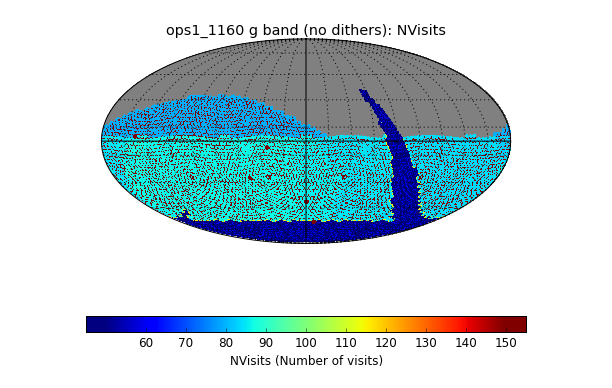

enigma_1189 NVisits g band (no dithers)


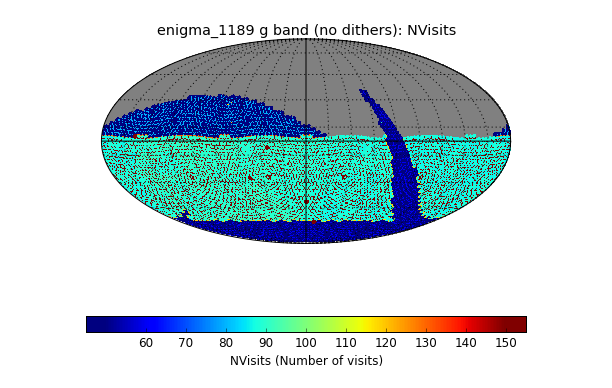

In [6]:
# And let's suppose we want to pull up the plots associated with a particular metric.
import os
from IPython.display import Image, display

metricName = 'NVisits'
slicerName = 'HealpixSlicer'
metricMetadata = 'g band (no dithers)'

imageList = []
for r in runs:
    mIds = runs[r]['sci'].getMetricId(metricName=metricName, slicerName=slicerName, metricMetadata=metricMetadata)
    plots = runs[r]['sci'].getPlotFiles(mIds)
    for p in plots:
        rootDir = r + '/sci'
        if p['plotType'] == 'SkyMap':
            print r, p['metricName'], p['metricMetadata']
            thumbfile = os.path.join(rootDir, 'thumb.' + p['plotFile'].replace('.pdf', '.png'))
            display(Image(thumbfile))